In [8]:
import numpy as np
import cv2, os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [9]:
imgs_path = './example/original'
save_path = './example/cropped'

In [ ]:
def load_images_from_folder(path):
    images = []
    for filename in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except:
            continue
        if img is not None:
            images.append(img)
    return images

In [ ]:
## Read images
images = load_images_from_folder(imgs_path)
len(images)

In [ ]:
## Fix image orientations
for file in os.listdir(imgs_path):
    img = Image.open(imgs_path + file)
    width, height = img.size
    if width > height:
        try:
            img = img.rotate(90, Image.NEAREST, expand = 1)
        except:
            print(file)
            continue
    img.save(imgs_path + file)

In [ ]:
## Resize Images
my_list = os.listdir(imgs_path)
for file in tqdm(range(len(os.listdir(imgs_path))//2,len(my_list))):  
    img = Image.open(imgs_path + my_list[file])
    img = img.resize((192,256))
    img.save('./example/augmented/' + my_list[file])

In [10]:
## Remove Whitespaces
for img_path in tqdm(os.listdir(imgs_path)):
    img = cv2.imread(imgs_path + '/' + img_path) # Read in the image and convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
    rect = img[y:y+h, x:x+w] # Crop the image - note we do this on the original image
    try:
        plt.imsave(save_path + '/' + img_path, rect)
    except:
        continue

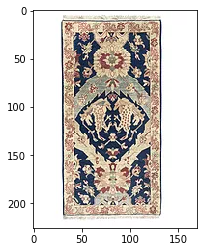

In [12]:
plt.imshow(img)

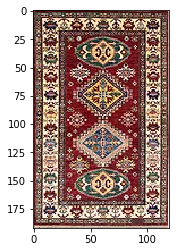

In [5]:
plt.imshow(rect)